In [3]:
#SCRIPT TO CREATE THE AUTOMATION FUNCTION
from tools import *

In [4]:
csv =pd.read_csv(r"C:\Users\cjang.WILDCAT\Desktop\eis\test", names = ['name', 'recal_indices', 'mask_choice'],index_col = 0, sep = " ", header = None)

In [5]:
csv.head()

,recal_indices,mask_choice
name,,
DE_104_10_30.mpt,[1],"[301.10504,39341.6554183904,0.0164047936644424..."
DE_49_5_30.mpt,NaN,1;
DE_40_8_60.mpt,"[2,1,0]","[43.7194276236431,147.21613849808,-38.42330064..."


In [6]:
mpt = mpt_data(path = r'C:\Users\cjang.WILDCAT\Desktop\eis\EIS_Manager\data\\', data = [csv.iloc[1].name])

[43.7194276236431, 147.21613849808, -38.4233006495612, 309.099416821945]
[707949.81, 316229.97]
No handles with labels found to put in legend.


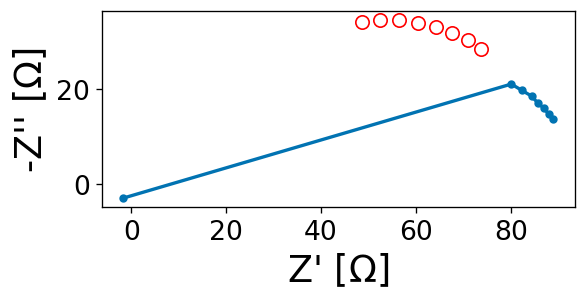

file    fit_Rs     fit_R1    fit_n1  fit_fs1        fit_Q1  \
0  DE_40_8_60.mpt -0.001684  19.409373  0.074786      NaN  3.534904e-08   

      fit_R2    fit_n2  fit_fs2        fit_Q2  fit_Q3    fit_n3  
0  69.035952  0.999998      NaN  3.819587e-09   0.001  0.565035  


In [23]:
#AUTO FUNCTION
for i in range(2,len(csv)):
    mpt = mpt_data(path = r'C:\Users\cjang.WILDCAT\Desktop\eis\EIS_Manager\data\\', data = [csv.iloc[1].name])
    if len((csv.iloc[i].mask_choice.strip('[')).strip('];')) == 1:
        if (csv.iloc[i].mask_choice.strip('[')).strip('];') == "1":
            mask_choice = mpt.fast_mask()
            masked_mpt = mpt_data(path = r'C:\Users\cjang.WILDCAT\Desktop\eis\EIS_Manager\data\\', data = [csv.iloc[i].name], mask = mask_choice)
            print(masked_mpt.guesser())
            #print(len(masked_mpt.df[0]))
        elif (csv.iloc[i].mask_choice.strip('[')).strip('];') == "2":
            mask_choice = mpt.masker0()
            masked_mpt = mpt_data(path =  r'C:\Users\cjang.WILDCAT\Desktop\eis\EIS_Manager\data\\', data = [csv.iloc[i].name], mask = mask_choice)
            print(masked_mpt.guesser())
        elif (csv.iloc[i].mask_choice.strip('[')).strip('];') == "3":
            mask_choice = mpt.masker()
            masked_mpt = mpt_data(path =  r'C:\Users\cjang.WILDCAT\Desktop\eis\EIS_Manager\data\\', data = [csv.iloc[i].name], mask = mask_choice)
            print(masked_mpt.guesser())
        elif (csv.iloc[i].mask_choice.strip('[')).strip('];') == "4":
            print(mpt.guesser())
            print('here')
        else:
            print('bad masking choice')
    else:
        print([float(i) for i in (csv.iloc[i].mask_choice.strip('[')).strip('];').split(',')])
        raw_window = [float(i) for i in (csv.iloc[i].mask_choice.strip('[')).strip('];').split(',')]
        print(mpt.window_masker([raw_window[0],raw_window[1]], [raw_window[2],raw_window[3]]))
        mask_choice = mpt.window_masker([raw_window[0],raw_window[1]], [raw_window[2],raw_window[3]])
        masked_mpt = mpt_data(path =  r'C:\Users\cjang.WILDCAT\Desktop\eis\EIS_Manager\data\\', data = [csv.iloc[i].name], mask = mask_choice)
        print(masked_mpt.guesser())

range(0, 2)